# Generation of training and testing data from models
****
- Data source: Dr. Michel Curé and Catalina Arcos, IFA UV
- Each model is stored in a file with a name like: "t4000g20v10.dat", where
 - t is the effective temperature: 4000 [K]
 - g is 10 times the logarithm of the gravity in [cm/seg^2]: 20/10 = 2.0
 - v_rot is the rotational velocity in [km/seg]: 10
 
- For this analysis we will consider:
 - v_rot >= 100
 - t_eff >= 15000
 - wavelength range [4460, 4480]

- Note that the y axis is the normalized flux


## Needed libraries

In [1]:
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import shutil

from sklearn.model_selection import train_test_split


## Functions

In [2]:
def string2params(string, show=True):
    s1 = string.partition("g")
    t = s1[0][1:]
    s2 = s1[2].partition("v")
    g = s2[0]
    v = s2[-1]
    if show:
        print(s1)
        print("t:",t)
        print(s2)
        print("g: ",float(g)/10)
        print("v:", v)
    return float(t), float(g)/10, float(v)

## Files list

In [3]:
files = glob.glob('filtered_wv_models/*')
m = len(files)
print("Number of files in models", m)
print("5 first files: \n", files[0:5])


Number of files in models 5425
5 first files: 
 ['filtered_wv_models\\f_t15000g20v100.dat', 'filtered_wv_models\\f_t15000g20v110.dat', 'filtered_wv_models\\f_t15000g20v120.dat', 'filtered_wv_models\\f_t15000g20v130.dat', 'filtered_wv_models\\f_t15000g20v140.dat']


## Building X an y matrices
*****

In [4]:
print("--> X has dimension", m, " x 201")
print("--> y has diemsnion", m, " x 3")

y = np.zeros((m,3))
df = pd.read_csv(files[0], sep=" ", header=None)
x_points = df[0].values
n_points, n_columns = df.shape
display(df[1].values.shape)
print("Num. of points in x axis: ", n_points)



--> X has dimension 5425  x 201
--> y has diemsnion 5425  x 3


(201,)

Num. of points in x axis:  201


In [5]:
# X matrix contains the spectral lines
X = np.zeros((m,n_points))
# y matrix contains the labels of each spectral line
y = np.zeros((m,3))
for i,name in enumerate(files):
    file_name = name.split("\\")[-1].split(".")[0]
    #file_name = name.split("/")[-1].split(".")[0]
    print(file_name)
    df = pd.read_csv(name, sep=" ", header=None)
    print(file_name.split("_")[1])
    t,g,v = string2params(file_name.split("_")[1])
    X[i,:] = df[1].values
    y[i] = t,g,v
    #print("----")

f_t15000g20v100
t15000g20v100
('t15000', 'g', '20v100')
t: 15000
('20', 'v', '100')
g:  2.0
v: 100
f_t15000g20v110
t15000g20v110
('t15000', 'g', '20v110')
t: 15000
('20', 'v', '110')
g:  2.0
v: 110
f_t15000g20v120
t15000g20v120
('t15000', 'g', '20v120')
t: 15000
('20', 'v', '120')
g:  2.0
v: 120
f_t15000g20v130
t15000g20v130
('t15000', 'g', '20v130')
t: 15000
('20', 'v', '130')
g:  2.0
v: 130
f_t15000g20v140
t15000g20v140
('t15000', 'g', '20v140')
t: 15000
('20', 'v', '140')
g:  2.0
v: 140
f_t15000g20v150
t15000g20v150
('t15000', 'g', '20v150')
t: 15000
('20', 'v', '150')
g:  2.0
v: 150
f_t15000g20v160
t15000g20v160
('t15000', 'g', '20v160')
t: 15000
('20', 'v', '160')
g:  2.0
v: 160
f_t15000g20v170
t15000g20v170
('t15000', 'g', '20v170')
t: 15000
('20', 'v', '170')
g:  2.0
v: 170
f_t15000g20v180
t15000g20v180
('t15000', 'g', '20v180')
t: 15000
('20', 'v', '180')
g:  2.0
v: 180
f_t15000g20v190
t15000g20v190
('t15000', 'g', '20v190')
t: 15000
('20', 'v', '190')
g:  2.0
v: 190
f_t15000g2

t15000g40v380
('t15000', 'g', '40v380')
t: 15000
('40', 'v', '380')
g:  4.0
v: 380
f_t15000g40v390
t15000g40v390
('t15000', 'g', '40v390')
t: 15000
('40', 'v', '390')
g:  4.0
v: 390
f_t15000g40v400
t15000g40v400
('t15000', 'g', '40v400')
t: 15000
('40', 'v', '400')
g:  4.0
v: 400
f_t15000g45v100
t15000g45v100
('t15000', 'g', '45v100')
t: 15000
('45', 'v', '100')
g:  4.5
v: 100
f_t15000g45v110
t15000g45v110
('t15000', 'g', '45v110')
t: 15000
('45', 'v', '110')
g:  4.5
v: 110
f_t15000g45v120
t15000g45v120
('t15000', 'g', '45v120')
t: 15000
('45', 'v', '120')
g:  4.5
v: 120
f_t15000g45v130
t15000g45v130
('t15000', 'g', '45v130')
t: 15000
('45', 'v', '130')
g:  4.5
v: 130
f_t15000g45v140
t15000g45v140
('t15000', 'g', '45v140')
t: 15000
('45', 'v', '140')
g:  4.5
v: 140
f_t15000g45v150
t15000g45v150
('t15000', 'g', '45v150')
t: 15000
('45', 'v', '150')
g:  4.5
v: 150
f_t15000g45v160
t15000g45v160
('t15000', 'g', '45v160')
t: 15000
('45', 'v', '160')
g:  4.5
v: 160
f_t15000g45v170
t15000g45v

t16000g20v390
('t16000', 'g', '20v390')
t: 16000
('20', 'v', '390')
g:  2.0
v: 390
f_t16000g20v400
t16000g20v400
('t16000', 'g', '20v400')
t: 16000
('20', 'v', '400')
g:  2.0
v: 400
f_t16000g25v100
t16000g25v100
('t16000', 'g', '25v100')
t: 16000
('25', 'v', '100')
g:  2.5
v: 100
f_t16000g25v110
t16000g25v110
('t16000', 'g', '25v110')
t: 16000
('25', 'v', '110')
g:  2.5
v: 110
f_t16000g25v120
t16000g25v120
('t16000', 'g', '25v120')
t: 16000
('25', 'v', '120')
g:  2.5
v: 120
f_t16000g25v130
t16000g25v130
('t16000', 'g', '25v130')
t: 16000
('25', 'v', '130')
g:  2.5
v: 130
f_t16000g25v140
t16000g25v140
('t16000', 'g', '25v140')
t: 16000
('25', 'v', '140')
g:  2.5
v: 140
f_t16000g25v150
t16000g25v150
('t16000', 'g', '25v150')
t: 16000
('25', 'v', '150')
g:  2.5
v: 150
f_t16000g25v160
t16000g25v160
('t16000', 'g', '25v160')
t: 16000
('25', 'v', '160')
g:  2.5
v: 160
f_t16000g25v170
t16000g25v170
('t16000', 'g', '25v170')
t: 16000
('25', 'v', '170')
g:  2.5
v: 170
f_t16000g25v180
t16000g25v

t16000g35v400
('t16000', 'g', '35v400')
t: 16000
('35', 'v', '400')
g:  3.5
v: 400
f_t16000g40v100
t16000g40v100
('t16000', 'g', '40v100')
t: 16000
('40', 'v', '100')
g:  4.0
v: 100
f_t16000g40v110
t16000g40v110
('t16000', 'g', '40v110')
t: 16000
('40', 'v', '110')
g:  4.0
v: 110
f_t16000g40v120
t16000g40v120
('t16000', 'g', '40v120')
t: 16000
('40', 'v', '120')
g:  4.0
v: 120
f_t16000g40v130
t16000g40v130
('t16000', 'g', '40v130')
t: 16000
('40', 'v', '130')
g:  4.0
v: 130
f_t16000g40v140
t16000g40v140
('t16000', 'g', '40v140')
t: 16000
('40', 'v', '140')
g:  4.0
v: 140
f_t16000g40v150
t16000g40v150
('t16000', 'g', '40v150')
t: 16000
('40', 'v', '150')
g:  4.0
v: 150
f_t16000g40v160
t16000g40v160
('t16000', 'g', '40v160')
t: 16000
('40', 'v', '160')
g:  4.0
v: 160
f_t16000g40v170
t16000g40v170
('t16000', 'g', '40v170')
t: 16000
('40', 'v', '170')
g:  4.0
v: 170
f_t16000g40v180
t16000g40v180
('t16000', 'g', '40v180')
t: 16000
('40', 'v', '180')
g:  4.0
v: 180
f_t16000g40v190
t16000g40v

t17000g20v160
('t17000', 'g', '20v160')
t: 17000
('20', 'v', '160')
g:  2.0
v: 160
f_t17000g20v170
t17000g20v170
('t17000', 'g', '20v170')
t: 17000
('20', 'v', '170')
g:  2.0
v: 170
f_t17000g20v180
t17000g20v180
('t17000', 'g', '20v180')
t: 17000
('20', 'v', '180')
g:  2.0
v: 180
f_t17000g20v190
t17000g20v190
('t17000', 'g', '20v190')
t: 17000
('20', 'v', '190')
g:  2.0
v: 190
f_t17000g20v200
t17000g20v200
('t17000', 'g', '20v200')
t: 17000
('20', 'v', '200')
g:  2.0
v: 200
f_t17000g20v210
t17000g20v210
('t17000', 'g', '20v210')
t: 17000
('20', 'v', '210')
g:  2.0
v: 210
f_t17000g20v220
t17000g20v220
('t17000', 'g', '20v220')
t: 17000
('20', 'v', '220')
g:  2.0
v: 220
f_t17000g20v230
t17000g20v230
('t17000', 'g', '20v230')
t: 17000
('20', 'v', '230')
g:  2.0
v: 230
f_t17000g20v240
t17000g20v240
('t17000', 'g', '20v240')
t: 17000
('20', 'v', '240')
g:  2.0
v: 240
f_t17000g20v250
t17000g20v250
('t17000', 'g', '20v250')
t: 17000
('20', 'v', '250')
g:  2.0
v: 250
f_t17000g20v260
t17000g20v

t17000g35v130
('t17000', 'g', '35v130')
t: 17000
('35', 'v', '130')
g:  3.5
v: 130
f_t17000g35v140
t17000g35v140
('t17000', 'g', '35v140')
t: 17000
('35', 'v', '140')
g:  3.5
v: 140
f_t17000g35v150
t17000g35v150
('t17000', 'g', '35v150')
t: 17000
('35', 'v', '150')
g:  3.5
v: 150
f_t17000g35v160
t17000g35v160
('t17000', 'g', '35v160')
t: 17000
('35', 'v', '160')
g:  3.5
v: 160
f_t17000g35v170
t17000g35v170
('t17000', 'g', '35v170')
t: 17000
('35', 'v', '170')
g:  3.5
v: 170
f_t17000g35v180
t17000g35v180
('t17000', 'g', '35v180')
t: 17000
('35', 'v', '180')
g:  3.5
v: 180
f_t17000g35v190
t17000g35v190
('t17000', 'g', '35v190')
t: 17000
('35', 'v', '190')
g:  3.5
v: 190
f_t17000g35v200
t17000g35v200
('t17000', 'g', '35v200')
t: 17000
('35', 'v', '200')
g:  3.5
v: 200
f_t17000g35v210
t17000g35v210
('t17000', 'g', '35v210')
t: 17000
('35', 'v', '210')
g:  3.5
v: 210
f_t17000g35v220
t17000g35v220
('t17000', 'g', '35v220')
t: 17000
('35', 'v', '220')
g:  3.5
v: 220
f_t17000g35v230
t17000g35v

t17000g45v400
('t17000', 'g', '45v400')
t: 17000
('45', 'v', '400')
g:  4.5
v: 400
f_t17000g50v100
t17000g50v100
('t17000', 'g', '50v100')
t: 17000
('50', 'v', '100')
g:  5.0
v: 100
f_t17000g50v110
t17000g50v110
('t17000', 'g', '50v110')
t: 17000
('50', 'v', '110')
g:  5.0
v: 110
f_t17000g50v120
t17000g50v120
('t17000', 'g', '50v120')
t: 17000
('50', 'v', '120')
g:  5.0
v: 120
f_t17000g50v130
t17000g50v130
('t17000', 'g', '50v130')
t: 17000
('50', 'v', '130')
g:  5.0
v: 130
f_t17000g50v140
t17000g50v140
('t17000', 'g', '50v140')
t: 17000
('50', 'v', '140')
g:  5.0
v: 140
f_t17000g50v150
t17000g50v150
('t17000', 'g', '50v150')
t: 17000
('50', 'v', '150')
g:  5.0
v: 150
f_t17000g50v160
t17000g50v160
('t17000', 'g', '50v160')
t: 17000
('50', 'v', '160')
g:  5.0
v: 160
f_t17000g50v170
t17000g50v170
('t17000', 'g', '50v170')
t: 17000
('50', 'v', '170')
g:  5.0
v: 170
f_t17000g50v180
t17000g50v180
('t17000', 'g', '50v180')
t: 17000
('50', 'v', '180')
g:  5.0
v: 180
f_t17000g50v190
t17000g50v

t18000g30v100
('t18000', 'g', '30v100')
t: 18000
('30', 'v', '100')
g:  3.0
v: 100
f_t18000g30v110
t18000g30v110
('t18000', 'g', '30v110')
t: 18000
('30', 'v', '110')
g:  3.0
v: 110
f_t18000g30v120
t18000g30v120
('t18000', 'g', '30v120')
t: 18000
('30', 'v', '120')
g:  3.0
v: 120
f_t18000g30v130
t18000g30v130
('t18000', 'g', '30v130')
t: 18000
('30', 'v', '130')
g:  3.0
v: 130
f_t18000g30v140
t18000g30v140
('t18000', 'g', '30v140')
t: 18000
('30', 'v', '140')
g:  3.0
v: 140
f_t18000g30v150
t18000g30v150
('t18000', 'g', '30v150')
t: 18000
('30', 'v', '150')
g:  3.0
v: 150
f_t18000g30v160
t18000g30v160
('t18000', 'g', '30v160')
t: 18000
('30', 'v', '160')
g:  3.0
v: 160
f_t18000g30v170
t18000g30v170
('t18000', 'g', '30v170')
t: 18000
('30', 'v', '170')
g:  3.0
v: 170
f_t18000g30v180
t18000g30v180
('t18000', 'g', '30v180')
t: 18000
('30', 'v', '180')
g:  3.0
v: 180
f_t18000g30v190
t18000g30v190
('t18000', 'g', '30v190')
t: 18000
('30', 'v', '190')
g:  3.0
v: 190
f_t18000g30v200
t18000g30v

t18000g45v100
('t18000', 'g', '45v100')
t: 18000
('45', 'v', '100')
g:  4.5
v: 100
f_t18000g45v110
t18000g45v110
('t18000', 'g', '45v110')
t: 18000
('45', 'v', '110')
g:  4.5
v: 110
f_t18000g45v120
t18000g45v120
('t18000', 'g', '45v120')
t: 18000
('45', 'v', '120')
g:  4.5
v: 120
f_t18000g45v130
t18000g45v130
('t18000', 'g', '45v130')
t: 18000
('45', 'v', '130')
g:  4.5
v: 130
f_t18000g45v140
t18000g45v140
('t18000', 'g', '45v140')
t: 18000
('45', 'v', '140')
g:  4.5
v: 140
f_t18000g45v150
t18000g45v150
('t18000', 'g', '45v150')
t: 18000
('45', 'v', '150')
g:  4.5
v: 150
f_t18000g45v160
t18000g45v160
('t18000', 'g', '45v160')
t: 18000
('45', 'v', '160')
g:  4.5
v: 160
f_t18000g45v170
t18000g45v170
('t18000', 'g', '45v170')
t: 18000
('45', 'v', '170')
g:  4.5
v: 170
f_t18000g45v180
t18000g45v180
('t18000', 'g', '45v180')
t: 18000
('45', 'v', '180')
g:  4.5
v: 180
f_t18000g45v190
t18000g45v190
('t18000', 'g', '45v190')
t: 18000
('45', 'v', '190')
g:  4.5
v: 190
f_t18000g45v200
t18000g45v

t19000g25v200
('t19000', 'g', '25v200')
t: 19000
('25', 'v', '200')
g:  2.5
v: 200
f_t19000g25v210
t19000g25v210
('t19000', 'g', '25v210')
t: 19000
('25', 'v', '210')
g:  2.5
v: 210
f_t19000g25v220
t19000g25v220
('t19000', 'g', '25v220')
t: 19000
('25', 'v', '220')
g:  2.5
v: 220
f_t19000g25v230
t19000g25v230
('t19000', 'g', '25v230')
t: 19000
('25', 'v', '230')
g:  2.5
v: 230
f_t19000g25v240
t19000g25v240
('t19000', 'g', '25v240')
t: 19000
('25', 'v', '240')
g:  2.5
v: 240
f_t19000g25v250
t19000g25v250
('t19000', 'g', '25v250')
t: 19000
('25', 'v', '250')
g:  2.5
v: 250
f_t19000g25v260
t19000g25v260
('t19000', 'g', '25v260')
t: 19000
('25', 'v', '260')
g:  2.5
v: 260
f_t19000g25v270
t19000g25v270
('t19000', 'g', '25v270')
t: 19000
('25', 'v', '270')
g:  2.5
v: 270
f_t19000g25v280
t19000g25v280
('t19000', 'g', '25v280')
t: 19000
('25', 'v', '280')
g:  2.5
v: 280
f_t19000g25v290
t19000g25v290
('t19000', 'g', '25v290')
t: 19000
('25', 'v', '290')
g:  2.5
v: 290
f_t19000g25v300
t19000g25v

t19000g45v170
('t19000', 'g', '45v170')
t: 19000
('45', 'v', '170')
g:  4.5
v: 170
f_t19000g45v180
t19000g45v180
('t19000', 'g', '45v180')
t: 19000
('45', 'v', '180')
g:  4.5
v: 180
f_t19000g45v190
t19000g45v190
('t19000', 'g', '45v190')
t: 19000
('45', 'v', '190')
g:  4.5
v: 190
f_t19000g45v200
t19000g45v200
('t19000', 'g', '45v200')
t: 19000
('45', 'v', '200')
g:  4.5
v: 200
f_t19000g45v210
t19000g45v210
('t19000', 'g', '45v210')
t: 19000
('45', 'v', '210')
g:  4.5
v: 210
f_t19000g45v220
t19000g45v220
('t19000', 'g', '45v220')
t: 19000
('45', 'v', '220')
g:  4.5
v: 220
f_t19000g45v230
t19000g45v230
('t19000', 'g', '45v230')
t: 19000
('45', 'v', '230')
g:  4.5
v: 230
f_t19000g45v240
t19000g45v240
('t19000', 'g', '45v240')
t: 19000
('45', 'v', '240')
g:  4.5
v: 240
f_t19000g45v250
t19000g45v250
('t19000', 'g', '45v250')
t: 19000
('45', 'v', '250')
g:  4.5
v: 250
f_t19000g45v260
t19000g45v260
('t19000', 'g', '45v260')
t: 19000
('45', 'v', '260')
g:  4.5
v: 260
f_t19000g45v270
t19000g45v

t20000g25v110
('t20000', 'g', '25v110')
t: 20000
('25', 'v', '110')
g:  2.5
v: 110
f_t20000g25v120
t20000g25v120
('t20000', 'g', '25v120')
t: 20000
('25', 'v', '120')
g:  2.5
v: 120
f_t20000g25v130
t20000g25v130
('t20000', 'g', '25v130')
t: 20000
('25', 'v', '130')
g:  2.5
v: 130
f_t20000g25v140
t20000g25v140
('t20000', 'g', '25v140')
t: 20000
('25', 'v', '140')
g:  2.5
v: 140
f_t20000g25v150
t20000g25v150
('t20000', 'g', '25v150')
t: 20000
('25', 'v', '150')
g:  2.5
v: 150
f_t20000g25v160
t20000g25v160
('t20000', 'g', '25v160')
t: 20000
('25', 'v', '160')
g:  2.5
v: 160
f_t20000g25v170
t20000g25v170
('t20000', 'g', '25v170')
t: 20000
('25', 'v', '170')
g:  2.5
v: 170
f_t20000g25v180
t20000g25v180
('t20000', 'g', '25v180')
t: 20000
('25', 'v', '180')
g:  2.5
v: 180
f_t20000g25v190
t20000g25v190
('t20000', 'g', '25v190')
t: 20000
('25', 'v', '190')
g:  2.5
v: 190
f_t20000g25v200
t20000g25v200
('t20000', 'g', '25v200')
t: 20000
('25', 'v', '200')
g:  2.5
v: 200
f_t20000g25v210
t20000g25v

t20000g40v300
('t20000', 'g', '40v300')
t: 20000
('40', 'v', '300')
g:  4.0
v: 300
f_t20000g40v310
t20000g40v310
('t20000', 'g', '40v310')
t: 20000
('40', 'v', '310')
g:  4.0
v: 310
f_t20000g40v320
t20000g40v320
('t20000', 'g', '40v320')
t: 20000
('40', 'v', '320')
g:  4.0
v: 320
f_t20000g40v330
t20000g40v330
('t20000', 'g', '40v330')
t: 20000
('40', 'v', '330')
g:  4.0
v: 330
f_t20000g40v340
t20000g40v340
('t20000', 'g', '40v340')
t: 20000
('40', 'v', '340')
g:  4.0
v: 340
f_t20000g40v350
t20000g40v350
('t20000', 'g', '40v350')
t: 20000
('40', 'v', '350')
g:  4.0
v: 350
f_t20000g40v360
t20000g40v360
('t20000', 'g', '40v360')
t: 20000
('40', 'v', '360')
g:  4.0
v: 360
f_t20000g40v370
t20000g40v370
('t20000', 'g', '40v370')
t: 20000
('40', 'v', '370')
g:  4.0
v: 370
f_t20000g40v380
t20000g40v380
('t20000', 'g', '40v380')
t: 20000
('40', 'v', '380')
g:  4.0
v: 380
f_t20000g40v390
t20000g40v390
('t20000', 'g', '40v390')
t: 20000
('40', 'v', '390')
g:  4.0
v: 390
f_t20000g40v400
t20000g40v

t21000g25v160
('t21000', 'g', '25v160')
t: 21000
('25', 'v', '160')
g:  2.5
v: 160
f_t21000g25v170
t21000g25v170
('t21000', 'g', '25v170')
t: 21000
('25', 'v', '170')
g:  2.5
v: 170
f_t21000g25v180
t21000g25v180
('t21000', 'g', '25v180')
t: 21000
('25', 'v', '180')
g:  2.5
v: 180
f_t21000g25v190
t21000g25v190
('t21000', 'g', '25v190')
t: 21000
('25', 'v', '190')
g:  2.5
v: 190
f_t21000g25v200
t21000g25v200
('t21000', 'g', '25v200')
t: 21000
('25', 'v', '200')
g:  2.5
v: 200
f_t21000g25v210
t21000g25v210
('t21000', 'g', '25v210')
t: 21000
('25', 'v', '210')
g:  2.5
v: 210
f_t21000g25v220
t21000g25v220
('t21000', 'g', '25v220')
t: 21000
('25', 'v', '220')
g:  2.5
v: 220
f_t21000g25v230
t21000g25v230
('t21000', 'g', '25v230')
t: 21000
('25', 'v', '230')
g:  2.5
v: 230
f_t21000g25v240
t21000g25v240
('t21000', 'g', '25v240')
t: 21000
('25', 'v', '240')
g:  2.5
v: 240
f_t21000g25v250
t21000g25v250
('t21000', 'g', '25v250')
t: 21000
('25', 'v', '250')
g:  2.5
v: 250
f_t21000g25v260
t21000g25v

t21000g40v110
('t21000', 'g', '40v110')
t: 21000
('40', 'v', '110')
g:  4.0
v: 110
f_t21000g40v120
t21000g40v120
('t21000', 'g', '40v120')
t: 21000
('40', 'v', '120')
g:  4.0
v: 120
f_t21000g40v130
t21000g40v130
('t21000', 'g', '40v130')
t: 21000
('40', 'v', '130')
g:  4.0
v: 130
f_t21000g40v140
t21000g40v140
('t21000', 'g', '40v140')
t: 21000
('40', 'v', '140')
g:  4.0
v: 140
f_t21000g40v150
t21000g40v150
('t21000', 'g', '40v150')
t: 21000
('40', 'v', '150')
g:  4.0
v: 150
f_t21000g40v160
t21000g40v160
('t21000', 'g', '40v160')
t: 21000
('40', 'v', '160')
g:  4.0
v: 160
f_t21000g40v170
t21000g40v170
('t21000', 'g', '40v170')
t: 21000
('40', 'v', '170')
g:  4.0
v: 170
f_t21000g40v180
t21000g40v180
('t21000', 'g', '40v180')
t: 21000
('40', 'v', '180')
g:  4.0
v: 180
f_t21000g40v190
t21000g40v190
('t21000', 'g', '40v190')
t: 21000
('40', 'v', '190')
g:  4.0
v: 190
f_t21000g40v200
t21000g40v200
('t21000', 'g', '40v200')
t: 21000
('40', 'v', '200')
g:  4.0
v: 200
f_t21000g40v210
t21000g40v

t21000g50v330
('t21000', 'g', '50v330')
t: 21000
('50', 'v', '330')
g:  5.0
v: 330
f_t21000g50v340
t21000g50v340
('t21000', 'g', '50v340')
t: 21000
('50', 'v', '340')
g:  5.0
v: 340
f_t21000g50v350
t21000g50v350
('t21000', 'g', '50v350')
t: 21000
('50', 'v', '350')
g:  5.0
v: 350
f_t21000g50v360
t21000g50v360
('t21000', 'g', '50v360')
t: 21000
('50', 'v', '360')
g:  5.0
v: 360
f_t21000g50v370
t21000g50v370
('t21000', 'g', '50v370')
t: 21000
('50', 'v', '370')
g:  5.0
v: 370
f_t21000g50v380
t21000g50v380
('t21000', 'g', '50v380')
t: 21000
('50', 'v', '380')
g:  5.0
v: 380
f_t21000g50v390
t21000g50v390
('t21000', 'g', '50v390')
t: 21000
('50', 'v', '390')
g:  5.0
v: 390
f_t21000g50v400
t21000g50v400
('t21000', 'g', '50v400')
t: 21000
('50', 'v', '400')
g:  5.0
v: 400
f_t22000g20v100
t22000g20v100
('t22000', 'g', '20v100')
t: 22000
('20', 'v', '100')
g:  2.0
v: 100
f_t22000g20v110
t22000g20v110
('t22000', 'g', '20v110')
t: 22000
('20', 'v', '110')
g:  2.0
v: 110
f_t22000g20v120
t22000g20v

t22000g35v150
('t22000', 'g', '35v150')
t: 22000
('35', 'v', '150')
g:  3.5
v: 150
f_t22000g35v160
t22000g35v160
('t22000', 'g', '35v160')
t: 22000
('35', 'v', '160')
g:  3.5
v: 160
f_t22000g35v170
t22000g35v170
('t22000', 'g', '35v170')
t: 22000
('35', 'v', '170')
g:  3.5
v: 170
f_t22000g35v180
t22000g35v180
('t22000', 'g', '35v180')
t: 22000
('35', 'v', '180')
g:  3.5
v: 180
f_t22000g35v190
t22000g35v190
('t22000', 'g', '35v190')
t: 22000
('35', 'v', '190')
g:  3.5
v: 190
f_t22000g35v200
t22000g35v200
('t22000', 'g', '35v200')
t: 22000
('35', 'v', '200')
g:  3.5
v: 200
f_t22000g35v210
t22000g35v210
('t22000', 'g', '35v210')
t: 22000
('35', 'v', '210')
g:  3.5
v: 210
f_t22000g35v220
t22000g35v220
('t22000', 'g', '35v220')
t: 22000
('35', 'v', '220')
g:  3.5
v: 220
f_t22000g35v230
t22000g35v230
('t22000', 'g', '35v230')
t: 22000
('35', 'v', '230')
g:  3.5
v: 230
f_t22000g35v240
t22000g35v240
('t22000', 'g', '35v240')
t: 22000
('35', 'v', '240')
g:  3.5
v: 240
f_t22000g35v250
t22000g35v

t22000g50v390
('t22000', 'g', '50v390')
t: 22000
('50', 'v', '390')
g:  5.0
v: 390
f_t22000g50v400
t22000g50v400
('t22000', 'g', '50v400')
t: 22000
('50', 'v', '400')
g:  5.0
v: 400
f_t23000g20v100
t23000g20v100
('t23000', 'g', '20v100')
t: 23000
('20', 'v', '100')
g:  2.0
v: 100
f_t23000g20v110
t23000g20v110
('t23000', 'g', '20v110')
t: 23000
('20', 'v', '110')
g:  2.0
v: 110
f_t23000g20v120
t23000g20v120
('t23000', 'g', '20v120')
t: 23000
('20', 'v', '120')
g:  2.0
v: 120
f_t23000g20v130
t23000g20v130
('t23000', 'g', '20v130')
t: 23000
('20', 'v', '130')
g:  2.0
v: 130
f_t23000g20v140
t23000g20v140
('t23000', 'g', '20v140')
t: 23000
('20', 'v', '140')
g:  2.0
v: 140
f_t23000g20v150
t23000g20v150
('t23000', 'g', '20v150')
t: 23000
('20', 'v', '150')
g:  2.0
v: 150
f_t23000g20v160
t23000g20v160
('t23000', 'g', '20v160')
t: 23000
('20', 'v', '160')
g:  2.0
v: 160
f_t23000g20v170
t23000g20v170
('t23000', 'g', '20v170')
t: 23000
('20', 'v', '170')
g:  2.0
v: 170
f_t23000g20v180
t23000g20v

t23000g35v280
('t23000', 'g', '35v280')
t: 23000
('35', 'v', '280')
g:  3.5
v: 280
f_t23000g35v290
t23000g35v290
('t23000', 'g', '35v290')
t: 23000
('35', 'v', '290')
g:  3.5
v: 290
f_t23000g35v300
t23000g35v300
('t23000', 'g', '35v300')
t: 23000
('35', 'v', '300')
g:  3.5
v: 300
f_t23000g35v310
t23000g35v310
('t23000', 'g', '35v310')
t: 23000
('35', 'v', '310')
g:  3.5
v: 310
f_t23000g35v320
t23000g35v320
('t23000', 'g', '35v320')
t: 23000
('35', 'v', '320')
g:  3.5
v: 320
f_t23000g35v330
t23000g35v330
('t23000', 'g', '35v330')
t: 23000
('35', 'v', '330')
g:  3.5
v: 330
f_t23000g35v340
t23000g35v340
('t23000', 'g', '35v340')
t: 23000
('35', 'v', '340')
g:  3.5
v: 340
f_t23000g35v350
t23000g35v350
('t23000', 'g', '35v350')
t: 23000
('35', 'v', '350')
g:  3.5
v: 350
f_t23000g35v360
t23000g35v360
('t23000', 'g', '35v360')
t: 23000
('35', 'v', '360')
g:  3.5
v: 360
f_t23000g35v370
t23000g35v370
('t23000', 'g', '35v370')
t: 23000
('35', 'v', '370')
g:  3.5
v: 370
f_t23000g35v380
t23000g35v

t24000g20v250
('t24000', 'g', '20v250')
t: 24000
('20', 'v', '250')
g:  2.0
v: 250
f_t24000g20v260
t24000g20v260
('t24000', 'g', '20v260')
t: 24000
('20', 'v', '260')
g:  2.0
v: 260
f_t24000g20v270
t24000g20v270
('t24000', 'g', '20v270')
t: 24000
('20', 'v', '270')
g:  2.0
v: 270
f_t24000g20v280
t24000g20v280
('t24000', 'g', '20v280')
t: 24000
('20', 'v', '280')
g:  2.0
v: 280
f_t24000g20v290
t24000g20v290
('t24000', 'g', '20v290')
t: 24000
('20', 'v', '290')
g:  2.0
v: 290
f_t24000g20v300
t24000g20v300
('t24000', 'g', '20v300')
t: 24000
('20', 'v', '300')
g:  2.0
v: 300
f_t24000g20v310
t24000g20v310
('t24000', 'g', '20v310')
t: 24000
('20', 'v', '310')
g:  2.0
v: 310
f_t24000g20v320
t24000g20v320
('t24000', 'g', '20v320')
t: 24000
('20', 'v', '320')
g:  2.0
v: 320
f_t24000g20v330
t24000g20v330
('t24000', 'g', '20v330')
t: 24000
('20', 'v', '330')
g:  2.0
v: 330
f_t24000g20v340
t24000g20v340
('t24000', 'g', '20v340')
t: 24000
('20', 'v', '340')
g:  2.0
v: 340
f_t24000g20v350
t24000g20v

t24000g40v160
('t24000', 'g', '40v160')
t: 24000
('40', 'v', '160')
g:  4.0
v: 160
f_t24000g40v170
t24000g40v170
('t24000', 'g', '40v170')
t: 24000
('40', 'v', '170')
g:  4.0
v: 170
f_t24000g40v180
t24000g40v180
('t24000', 'g', '40v180')
t: 24000
('40', 'v', '180')
g:  4.0
v: 180
f_t24000g40v190
t24000g40v190
('t24000', 'g', '40v190')
t: 24000
('40', 'v', '190')
g:  4.0
v: 190
f_t24000g40v200
t24000g40v200
('t24000', 'g', '40v200')
t: 24000
('40', 'v', '200')
g:  4.0
v: 200
f_t24000g40v210
t24000g40v210
('t24000', 'g', '40v210')
t: 24000
('40', 'v', '210')
g:  4.0
v: 210
f_t24000g40v220
t24000g40v220
('t24000', 'g', '40v220')
t: 24000
('40', 'v', '220')
g:  4.0
v: 220
f_t24000g40v230
t24000g40v230
('t24000', 'g', '40v230')
t: 24000
('40', 'v', '230')
g:  4.0
v: 230
f_t24000g40v240
t24000g40v240
('t24000', 'g', '40v240')
t: 24000
('40', 'v', '240')
g:  4.0
v: 240
f_t24000g40v250
t24000g40v250
('t24000', 'g', '40v250')
t: 24000
('40', 'v', '250')
g:  4.0
v: 250
f_t24000g40v260
t24000g40v

t25000g25v130
('t25000', 'g', '25v130')
t: 25000
('25', 'v', '130')
g:  2.5
v: 130
f_t25000g25v140
t25000g25v140
('t25000', 'g', '25v140')
t: 25000
('25', 'v', '140')
g:  2.5
v: 140
f_t25000g25v150
t25000g25v150
('t25000', 'g', '25v150')
t: 25000
('25', 'v', '150')
g:  2.5
v: 150
f_t25000g25v160
t25000g25v160
('t25000', 'g', '25v160')
t: 25000
('25', 'v', '160')
g:  2.5
v: 160
f_t25000g25v170
t25000g25v170
('t25000', 'g', '25v170')
t: 25000
('25', 'v', '170')
g:  2.5
v: 170
f_t25000g25v180
t25000g25v180
('t25000', 'g', '25v180')
t: 25000
('25', 'v', '180')
g:  2.5
v: 180
f_t25000g25v190
t25000g25v190
('t25000', 'g', '25v190')
t: 25000
('25', 'v', '190')
g:  2.5
v: 190
f_t25000g25v200
t25000g25v200
('t25000', 'g', '25v200')
t: 25000
('25', 'v', '200')
g:  2.5
v: 200
f_t25000g25v210
t25000g25v210
('t25000', 'g', '25v210')
t: 25000
('25', 'v', '210')
g:  2.5
v: 210
f_t25000g25v220
t25000g25v220
('t25000', 'g', '25v220')
t: 25000
('25', 'v', '220')
g:  2.5
v: 220
f_t25000g25v230
t25000g25v

t25000g40v320
('t25000', 'g', '40v320')
t: 25000
('40', 'v', '320')
g:  4.0
v: 320
f_t25000g40v330
t25000g40v330
('t25000', 'g', '40v330')
t: 25000
('40', 'v', '330')
g:  4.0
v: 330
f_t25000g40v340
t25000g40v340
('t25000', 'g', '40v340')
t: 25000
('40', 'v', '340')
g:  4.0
v: 340
f_t25000g40v350
t25000g40v350
('t25000', 'g', '40v350')
t: 25000
('40', 'v', '350')
g:  4.0
v: 350
f_t25000g40v360
t25000g40v360
('t25000', 'g', '40v360')
t: 25000
('40', 'v', '360')
g:  4.0
v: 360
f_t25000g40v370
t25000g40v370
('t25000', 'g', '40v370')
t: 25000
('40', 'v', '370')
g:  4.0
v: 370
f_t25000g40v380
t25000g40v380
('t25000', 'g', '40v380')
t: 25000
('40', 'v', '380')
g:  4.0
v: 380
f_t25000g40v390
t25000g40v390
('t25000', 'g', '40v390')
t: 25000
('40', 'v', '390')
g:  4.0
v: 390
f_t25000g40v400
t25000g40v400
('t25000', 'g', '40v400')
t: 25000
('40', 'v', '400')
g:  4.0
v: 400
f_t25000g45v100
t25000g45v100
('t25000', 'g', '45v100')
t: 25000
('45', 'v', '100')
g:  4.5
v: 100
f_t25000g45v110
t25000g45v

t26000g25v320
('t26000', 'g', '25v320')
t: 26000
('25', 'v', '320')
g:  2.5
v: 320
f_t26000g25v330
t26000g25v330
('t26000', 'g', '25v330')
t: 26000
('25', 'v', '330')
g:  2.5
v: 330
f_t26000g25v340
t26000g25v340
('t26000', 'g', '25v340')
t: 26000
('25', 'v', '340')
g:  2.5
v: 340
f_t26000g25v350
t26000g25v350
('t26000', 'g', '25v350')
t: 26000
('25', 'v', '350')
g:  2.5
v: 350
f_t26000g25v360
t26000g25v360
('t26000', 'g', '25v360')
t: 26000
('25', 'v', '360')
g:  2.5
v: 360
f_t26000g25v370
t26000g25v370
('t26000', 'g', '25v370')
t: 26000
('25', 'v', '370')
g:  2.5
v: 370
f_t26000g25v380
t26000g25v380
('t26000', 'g', '25v380')
t: 26000
('25', 'v', '380')
g:  2.5
v: 380
f_t26000g25v390
t26000g25v390
('t26000', 'g', '25v390')
t: 26000
('25', 'v', '390')
g:  2.5
v: 390
f_t26000g25v400
t26000g25v400
('t26000', 'g', '25v400')
t: 26000
('25', 'v', '400')
g:  2.5
v: 400
f_t26000g30v100
t26000g30v100
('t26000', 'g', '30v100')
t: 26000
('30', 'v', '100')
g:  3.0
v: 100
f_t26000g30v110
t26000g30v

t26000g45v230
('t26000', 'g', '45v230')
t: 26000
('45', 'v', '230')
g:  4.5
v: 230
f_t26000g45v240
t26000g45v240
('t26000', 'g', '45v240')
t: 26000
('45', 'v', '240')
g:  4.5
v: 240
f_t26000g45v250
t26000g45v250
('t26000', 'g', '45v250')
t: 26000
('45', 'v', '250')
g:  4.5
v: 250
f_t26000g45v260
t26000g45v260
('t26000', 'g', '45v260')
t: 26000
('45', 'v', '260')
g:  4.5
v: 260
f_t26000g45v270
t26000g45v270
('t26000', 'g', '45v270')
t: 26000
('45', 'v', '270')
g:  4.5
v: 270
f_t26000g45v280
t26000g45v280
('t26000', 'g', '45v280')
t: 26000
('45', 'v', '280')
g:  4.5
v: 280
f_t26000g45v290
t26000g45v290
('t26000', 'g', '45v290')
t: 26000
('45', 'v', '290')
g:  4.5
v: 290
f_t26000g45v300
t26000g45v300
('t26000', 'g', '45v300')
t: 26000
('45', 'v', '300')
g:  4.5
v: 300
f_t26000g45v310
t26000g45v310
('t26000', 'g', '45v310')
t: 26000
('45', 'v', '310')
g:  4.5
v: 310
f_t26000g45v320
t26000g45v320
('t26000', 'g', '45v320')
t: 26000
('45', 'v', '320')
g:  4.5
v: 320
f_t26000g45v330
t26000g45v

t27000g25v270
('t27000', 'g', '25v270')
t: 27000
('25', 'v', '270')
g:  2.5
v: 270
f_t27000g25v280
t27000g25v280
('t27000', 'g', '25v280')
t: 27000
('25', 'v', '280')
g:  2.5
v: 280
f_t27000g25v290
t27000g25v290
('t27000', 'g', '25v290')
t: 27000
('25', 'v', '290')
g:  2.5
v: 290
f_t27000g25v300
t27000g25v300
('t27000', 'g', '25v300')
t: 27000
('25', 'v', '300')
g:  2.5
v: 300
f_t27000g25v310
t27000g25v310
('t27000', 'g', '25v310')
t: 27000
('25', 'v', '310')
g:  2.5
v: 310
f_t27000g25v320
t27000g25v320
('t27000', 'g', '25v320')
t: 27000
('25', 'v', '320')
g:  2.5
v: 320
f_t27000g25v330
t27000g25v330
('t27000', 'g', '25v330')
t: 27000
('25', 'v', '330')
g:  2.5
v: 330
f_t27000g25v340
t27000g25v340
('t27000', 'g', '25v340')
t: 27000
('25', 'v', '340')
g:  2.5
v: 340
f_t27000g25v350
t27000g25v350
('t27000', 'g', '25v350')
t: 27000
('25', 'v', '350')
g:  2.5
v: 350
f_t27000g25v360
t27000g25v360
('t27000', 'g', '25v360')
t: 27000
('25', 'v', '360')
g:  2.5
v: 360
f_t27000g25v370
t27000g25v

t27000g40v220
('t27000', 'g', '40v220')
t: 27000
('40', 'v', '220')
g:  4.0
v: 220
f_t27000g40v230
t27000g40v230
('t27000', 'g', '40v230')
t: 27000
('40', 'v', '230')
g:  4.0
v: 230
f_t27000g40v240
t27000g40v240
('t27000', 'g', '40v240')
t: 27000
('40', 'v', '240')
g:  4.0
v: 240
f_t27000g40v250
t27000g40v250
('t27000', 'g', '40v250')
t: 27000
('40', 'v', '250')
g:  4.0
v: 250
f_t27000g40v260
t27000g40v260
('t27000', 'g', '40v260')
t: 27000
('40', 'v', '260')
g:  4.0
v: 260
f_t27000g40v270
t27000g40v270
('t27000', 'g', '40v270')
t: 27000
('40', 'v', '270')
g:  4.0
v: 270
f_t27000g40v280
t27000g40v280
('t27000', 'g', '40v280')
t: 27000
('40', 'v', '280')
g:  4.0
v: 280
f_t27000g40v290
t27000g40v290
('t27000', 'g', '40v290')
t: 27000
('40', 'v', '290')
g:  4.0
v: 290
f_t27000g40v300
t27000g40v300
('t27000', 'g', '40v300')
t: 27000
('40', 'v', '300')
g:  4.0
v: 300
f_t27000g40v310
t27000g40v310
('t27000', 'g', '40v310')
t: 27000
('40', 'v', '310')
g:  4.0
v: 310
f_t27000g40v320
t27000g40v

t28000g20v380
('t28000', 'g', '20v380')
t: 28000
('20', 'v', '380')
g:  2.0
v: 380
f_t28000g20v390
t28000g20v390
('t28000', 'g', '20v390')
t: 28000
('20', 'v', '390')
g:  2.0
v: 390
f_t28000g20v400
t28000g20v400
('t28000', 'g', '20v400')
t: 28000
('20', 'v', '400')
g:  2.0
v: 400
f_t28000g25v100
t28000g25v100
('t28000', 'g', '25v100')
t: 28000
('25', 'v', '100')
g:  2.5
v: 100
f_t28000g25v110
t28000g25v110
('t28000', 'g', '25v110')
t: 28000
('25', 'v', '110')
g:  2.5
v: 110
f_t28000g25v120
t28000g25v120
('t28000', 'g', '25v120')
t: 28000
('25', 'v', '120')
g:  2.5
v: 120
f_t28000g25v130
t28000g25v130
('t28000', 'g', '25v130')
t: 28000
('25', 'v', '130')
g:  2.5
v: 130
f_t28000g25v140
t28000g25v140
('t28000', 'g', '25v140')
t: 28000
('25', 'v', '140')
g:  2.5
v: 140
f_t28000g25v150
t28000g25v150
('t28000', 'g', '25v150')
t: 28000
('25', 'v', '150')
g:  2.5
v: 150
f_t28000g25v160
t28000g25v160
('t28000', 'g', '25v160')
t: 28000
('25', 'v', '160')
g:  2.5
v: 160
f_t28000g25v170
t28000g25v

g:  4.0
v: 200
f_t28000g40v210
t28000g40v210
('t28000', 'g', '40v210')
t: 28000
('40', 'v', '210')
g:  4.0
v: 210
f_t28000g40v220
t28000g40v220
('t28000', 'g', '40v220')
t: 28000
('40', 'v', '220')
g:  4.0
v: 220
f_t28000g40v230
t28000g40v230
('t28000', 'g', '40v230')
t: 28000
('40', 'v', '230')
g:  4.0
v: 230
f_t28000g40v240
t28000g40v240
('t28000', 'g', '40v240')
t: 28000
('40', 'v', '240')
g:  4.0
v: 240
f_t28000g40v250
t28000g40v250
('t28000', 'g', '40v250')
t: 28000
('40', 'v', '250')
g:  4.0
v: 250
f_t28000g40v260
t28000g40v260
('t28000', 'g', '40v260')
t: 28000
('40', 'v', '260')
g:  4.0
v: 260
f_t28000g40v270
t28000g40v270
('t28000', 'g', '40v270')
t: 28000
('40', 'v', '270')
g:  4.0
v: 270
f_t28000g40v280
t28000g40v280
('t28000', 'g', '40v280')
t: 28000
('40', 'v', '280')
g:  4.0
v: 280
f_t28000g40v290
t28000g40v290
('t28000', 'g', '40v290')
t: 28000
('40', 'v', '290')
g:  4.0
v: 290
f_t28000g40v300
t28000g40v300
('t28000', 'g', '40v300')
t: 28000
('40', 'v', '300')
g:  4.0
v:

t29000g20v390
('t29000', 'g', '20v390')
t: 29000
('20', 'v', '390')
g:  2.0
v: 390
f_t29000g20v400
t29000g20v400
('t29000', 'g', '20v400')
t: 29000
('20', 'v', '400')
g:  2.0
v: 400
f_t29000g25v100
t29000g25v100
('t29000', 'g', '25v100')
t: 29000
('25', 'v', '100')
g:  2.5
v: 100
f_t29000g25v110
t29000g25v110
('t29000', 'g', '25v110')
t: 29000
('25', 'v', '110')
g:  2.5
v: 110
f_t29000g25v120
t29000g25v120
('t29000', 'g', '25v120')
t: 29000
('25', 'v', '120')
g:  2.5
v: 120
f_t29000g25v130
t29000g25v130
('t29000', 'g', '25v130')
t: 29000
('25', 'v', '130')
g:  2.5
v: 130
f_t29000g25v140
t29000g25v140
('t29000', 'g', '25v140')
t: 29000
('25', 'v', '140')
g:  2.5
v: 140
f_t29000g25v150
t29000g25v150
('t29000', 'g', '25v150')
t: 29000
('25', 'v', '150')
g:  2.5
v: 150
f_t29000g25v160
t29000g25v160
('t29000', 'g', '25v160')
t: 29000
('25', 'v', '160')
g:  2.5
v: 160
f_t29000g25v170
t29000g25v170
('t29000', 'g', '25v170')
t: 29000
('25', 'v', '170')
g:  2.5
v: 170
f_t29000g25v180
t29000g25v

t29000g40v240
('t29000', 'g', '40v240')
t: 29000
('40', 'v', '240')
g:  4.0
v: 240
f_t29000g40v250
t29000g40v250
('t29000', 'g', '40v250')
t: 29000
('40', 'v', '250')
g:  4.0
v: 250
f_t29000g40v260
t29000g40v260
('t29000', 'g', '40v260')
t: 29000
('40', 'v', '260')
g:  4.0
v: 260
f_t29000g40v270
t29000g40v270
('t29000', 'g', '40v270')
t: 29000
('40', 'v', '270')
g:  4.0
v: 270
f_t29000g40v280
t29000g40v280
('t29000', 'g', '40v280')
t: 29000
('40', 'v', '280')
g:  4.0
v: 280
f_t29000g40v290
t29000g40v290
('t29000', 'g', '40v290')
t: 29000
('40', 'v', '290')
g:  4.0
v: 290
f_t29000g40v300
t29000g40v300
('t29000', 'g', '40v300')
t: 29000
('40', 'v', '300')
g:  4.0
v: 300
f_t29000g40v310
t29000g40v310
('t29000', 'g', '40v310')
t: 29000
('40', 'v', '310')
g:  4.0
v: 310
f_t29000g40v320
t29000g40v320
('t29000', 'g', '40v320')
t: 29000
('40', 'v', '320')
g:  4.0
v: 320
f_t29000g40v330
t29000g40v330
('t29000', 'g', '40v330')
t: 29000
('40', 'v', '330')
g:  4.0
v: 330
f_t29000g40v340
t29000g40v

t30000g25v100
('t30000', 'g', '25v100')
t: 30000
('25', 'v', '100')
g:  2.5
v: 100
f_t30000g25v110
t30000g25v110
('t30000', 'g', '25v110')
t: 30000
('25', 'v', '110')
g:  2.5
v: 110
f_t30000g25v120
t30000g25v120
('t30000', 'g', '25v120')
t: 30000
('25', 'v', '120')
g:  2.5
v: 120
f_t30000g25v130
t30000g25v130
('t30000', 'g', '25v130')
t: 30000
('25', 'v', '130')
g:  2.5
v: 130
f_t30000g25v140
t30000g25v140
('t30000', 'g', '25v140')
t: 30000
('25', 'v', '140')
g:  2.5
v: 140
f_t30000g25v150
t30000g25v150
('t30000', 'g', '25v150')
t: 30000
('25', 'v', '150')
g:  2.5
v: 150
f_t30000g25v160
t30000g25v160
('t30000', 'g', '25v160')
t: 30000
('25', 'v', '160')
g:  2.5
v: 160
f_t30000g25v170
t30000g25v170
('t30000', 'g', '25v170')
t: 30000
('25', 'v', '170')
g:  2.5
v: 170
f_t30000g25v180
t30000g25v180
('t30000', 'g', '25v180')
t: 30000
('25', 'v', '180')
g:  2.5
v: 180
f_t30000g25v190
t30000g25v190
('t30000', 'g', '25v190')
t: 30000
('25', 'v', '190')
g:  2.5
v: 190
f_t30000g25v200
t30000g25v

t30000g40v340
('t30000', 'g', '40v340')
t: 30000
('40', 'v', '340')
g:  4.0
v: 340
f_t30000g40v350
t30000g40v350
('t30000', 'g', '40v350')
t: 30000
('40', 'v', '350')
g:  4.0
v: 350
f_t30000g40v360
t30000g40v360
('t30000', 'g', '40v360')
t: 30000
('40', 'v', '360')
g:  4.0
v: 360
f_t30000g40v370
t30000g40v370
('t30000', 'g', '40v370')
t: 30000
('40', 'v', '370')
g:  4.0
v: 370
f_t30000g40v380
t30000g40v380
('t30000', 'g', '40v380')
t: 30000
('40', 'v', '380')
g:  4.0
v: 380
f_t30000g40v390
t30000g40v390
('t30000', 'g', '40v390')
t: 30000
('40', 'v', '390')
g:  4.0
v: 390
f_t30000g40v400
t30000g40v400
('t30000', 'g', '40v400')
t: 30000
('40', 'v', '400')
g:  4.0
v: 400
f_t30000g45v100
t30000g45v100
('t30000', 'g', '45v100')
t: 30000
('45', 'v', '100')
g:  4.5
v: 100
f_t30000g45v110
t30000g45v110
('t30000', 'g', '45v110')
t: 30000
('45', 'v', '110')
g:  4.5
v: 110
f_t30000g45v120
t30000g45v120
('t30000', 'g', '45v120')
t: 30000
('45', 'v', '120')
g:  4.5
v: 120
f_t30000g45v130
t30000g45v

t31000g25v220
('t31000', 'g', '25v220')
t: 31000
('25', 'v', '220')
g:  2.5
v: 220
f_t31000g25v230
t31000g25v230
('t31000', 'g', '25v230')
t: 31000
('25', 'v', '230')
g:  2.5
v: 230
f_t31000g25v240
t31000g25v240
('t31000', 'g', '25v240')
t: 31000
('25', 'v', '240')
g:  2.5
v: 240
f_t31000g25v250
t31000g25v250
('t31000', 'g', '25v250')
t: 31000
('25', 'v', '250')
g:  2.5
v: 250
f_t31000g25v260
t31000g25v260
('t31000', 'g', '25v260')
t: 31000
('25', 'v', '260')
g:  2.5
v: 260
f_t31000g25v270
t31000g25v270
('t31000', 'g', '25v270')
t: 31000
('25', 'v', '270')
g:  2.5
v: 270
f_t31000g25v280
t31000g25v280
('t31000', 'g', '25v280')
t: 31000
('25', 'v', '280')
g:  2.5
v: 280
f_t31000g25v290
t31000g25v290
('t31000', 'g', '25v290')
t: 31000
('25', 'v', '290')
g:  2.5
v: 290
f_t31000g25v300
t31000g25v300
('t31000', 'g', '25v300')
t: 31000
('25', 'v', '300')
g:  2.5
v: 300
f_t31000g25v310
t31000g25v310
('t31000', 'g', '25v310')
t: 31000
('25', 'v', '310')
g:  2.5
v: 310
f_t31000g25v320
t31000g25v

t31000g40v400
('t31000', 'g', '40v400')
t: 31000
('40', 'v', '400')
g:  4.0
v: 400
f_t31000g45v100
t31000g45v100
('t31000', 'g', '45v100')
t: 31000
('45', 'v', '100')
g:  4.5
v: 100
f_t31000g45v110
t31000g45v110
('t31000', 'g', '45v110')
t: 31000
('45', 'v', '110')
g:  4.5
v: 110
f_t31000g45v120
t31000g45v120
('t31000', 'g', '45v120')
t: 31000
('45', 'v', '120')
g:  4.5
v: 120
f_t31000g45v130
t31000g45v130
('t31000', 'g', '45v130')
t: 31000
('45', 'v', '130')
g:  4.5
v: 130
f_t31000g45v140
t31000g45v140
('t31000', 'g', '45v140')
t: 31000
('45', 'v', '140')
g:  4.5
v: 140
f_t31000g45v150
t31000g45v150
('t31000', 'g', '45v150')
t: 31000
('45', 'v', '150')
g:  4.5
v: 150
f_t31000g45v160
t31000g45v160
('t31000', 'g', '45v160')
t: 31000
('45', 'v', '160')
g:  4.5
v: 160
f_t31000g45v170
t31000g45v170
('t31000', 'g', '45v170')
t: 31000
('45', 'v', '170')
g:  4.5
v: 170
f_t31000g45v180
t31000g45v180
('t31000', 'g', '45v180')
t: 31000
('45', 'v', '180')
g:  4.5
v: 180
f_t31000g45v190
t31000g45v

t32000g25v320
('t32000', 'g', '25v320')
t: 32000
('25', 'v', '320')
g:  2.5
v: 320
f_t32000g25v330
t32000g25v330
('t32000', 'g', '25v330')
t: 32000
('25', 'v', '330')
g:  2.5
v: 330
f_t32000g25v340
t32000g25v340
('t32000', 'g', '25v340')
t: 32000
('25', 'v', '340')
g:  2.5
v: 340
f_t32000g25v350
t32000g25v350
('t32000', 'g', '25v350')
t: 32000
('25', 'v', '350')
g:  2.5
v: 350
f_t32000g25v360
t32000g25v360
('t32000', 'g', '25v360')
t: 32000
('25', 'v', '360')
g:  2.5
v: 360
f_t32000g25v370
t32000g25v370
('t32000', 'g', '25v370')
t: 32000
('25', 'v', '370')
g:  2.5
v: 370
f_t32000g25v380
t32000g25v380
('t32000', 'g', '25v380')
t: 32000
('25', 'v', '380')
g:  2.5
v: 380
f_t32000g25v390
t32000g25v390
('t32000', 'g', '25v390')
t: 32000
('25', 'v', '390')
g:  2.5
v: 390
f_t32000g25v400
t32000g25v400
('t32000', 'g', '25v400')
t: 32000
('25', 'v', '400')
g:  2.5
v: 400
f_t32000g30v100
t32000g30v100
('t32000', 'g', '30v100')
t: 32000
('30', 'v', '100')
g:  3.0
v: 100
f_t32000g30v110
t32000g30v

t32000g45v200
('t32000', 'g', '45v200')
t: 32000
('45', 'v', '200')
g:  4.5
v: 200
f_t32000g45v210
t32000g45v210
('t32000', 'g', '45v210')
t: 32000
('45', 'v', '210')
g:  4.5
v: 210
f_t32000g45v220
t32000g45v220
('t32000', 'g', '45v220')
t: 32000
('45', 'v', '220')
g:  4.5
v: 220
f_t32000g45v230
t32000g45v230
('t32000', 'g', '45v230')
t: 32000
('45', 'v', '230')
g:  4.5
v: 230
f_t32000g45v240
t32000g45v240
('t32000', 'g', '45v240')
t: 32000
('45', 'v', '240')
g:  4.5
v: 240
f_t32000g45v250
t32000g45v250
('t32000', 'g', '45v250')
t: 32000
('45', 'v', '250')
g:  4.5
v: 250
f_t32000g45v260
t32000g45v260
('t32000', 'g', '45v260')
t: 32000
('45', 'v', '260')
g:  4.5
v: 260
f_t32000g45v270
t32000g45v270
('t32000', 'g', '45v270')
t: 32000
('45', 'v', '270')
g:  4.5
v: 270
f_t32000g45v280
t32000g45v280
('t32000', 'g', '45v280')
t: 32000
('45', 'v', '280')
g:  4.5
v: 280
f_t32000g45v290
t32000g45v290
('t32000', 'g', '45v290')
t: 32000
('45', 'v', '290')
g:  4.5
v: 290
f_t32000g45v300
t32000g45v

t33000g25v400
('t33000', 'g', '25v400')
t: 33000
('25', 'v', '400')
g:  2.5
v: 400
f_t33000g30v100
t33000g30v100
('t33000', 'g', '30v100')
t: 33000
('30', 'v', '100')
g:  3.0
v: 100
f_t33000g30v110
t33000g30v110
('t33000', 'g', '30v110')
t: 33000
('30', 'v', '110')
g:  3.0
v: 110
f_t33000g30v120
t33000g30v120
('t33000', 'g', '30v120')
t: 33000
('30', 'v', '120')
g:  3.0
v: 120
f_t33000g30v130
t33000g30v130
('t33000', 'g', '30v130')
t: 33000
('30', 'v', '130')
g:  3.0
v: 130
f_t33000g30v140
t33000g30v140
('t33000', 'g', '30v140')
t: 33000
('30', 'v', '140')
g:  3.0
v: 140
f_t33000g30v150
t33000g30v150
('t33000', 'g', '30v150')
t: 33000
('30', 'v', '150')
g:  3.0
v: 150
f_t33000g30v160
t33000g30v160
('t33000', 'g', '30v160')
t: 33000
('30', 'v', '160')
g:  3.0
v: 160
f_t33000g30v170
t33000g30v170
('t33000', 'g', '30v170')
t: 33000
('30', 'v', '170')
g:  3.0
v: 170
f_t33000g30v180
t33000g30v180
('t33000', 'g', '30v180')
t: 33000
('30', 'v', '180')
g:  3.0
v: 180
f_t33000g30v190
t33000g30v

t33000g50v130
('t33000', 'g', '50v130')
t: 33000
('50', 'v', '130')
g:  5.0
v: 130
f_t33000g50v140
t33000g50v140
('t33000', 'g', '50v140')
t: 33000
('50', 'v', '140')
g:  5.0
v: 140
f_t33000g50v150
t33000g50v150
('t33000', 'g', '50v150')
t: 33000
('50', 'v', '150')
g:  5.0
v: 150
f_t33000g50v160
t33000g50v160
('t33000', 'g', '50v160')
t: 33000
('50', 'v', '160')
g:  5.0
v: 160
f_t33000g50v170
t33000g50v170
('t33000', 'g', '50v170')
t: 33000
('50', 'v', '170')
g:  5.0
v: 170
f_t33000g50v180
t33000g50v180
('t33000', 'g', '50v180')
t: 33000
('50', 'v', '180')
g:  5.0
v: 180
f_t33000g50v190
t33000g50v190
('t33000', 'g', '50v190')
t: 33000
('50', 'v', '190')
g:  5.0
v: 190
f_t33000g50v200
t33000g50v200
('t33000', 'g', '50v200')
t: 33000
('50', 'v', '200')
g:  5.0
v: 200
f_t33000g50v210
t33000g50v210
('t33000', 'g', '50v210')
t: 33000
('50', 'v', '210')
g:  5.0
v: 210
f_t33000g50v220
t33000g50v220
('t33000', 'g', '50v220')
t: 33000
('50', 'v', '220')
g:  5.0
v: 220
f_t33000g50v230
t33000g50v

t34000g30v350
('t34000', 'g', '30v350')
t: 34000
('30', 'v', '350')
g:  3.0
v: 350
f_t34000g30v360
t34000g30v360
('t34000', 'g', '30v360')
t: 34000
('30', 'v', '360')
g:  3.0
v: 360
f_t34000g30v370
t34000g30v370
('t34000', 'g', '30v370')
t: 34000
('30', 'v', '370')
g:  3.0
v: 370
f_t34000g30v380
t34000g30v380
('t34000', 'g', '30v380')
t: 34000
('30', 'v', '380')
g:  3.0
v: 380
f_t34000g30v390
t34000g30v390
('t34000', 'g', '30v390')
t: 34000
('30', 'v', '390')
g:  3.0
v: 390
f_t34000g30v400
t34000g30v400
('t34000', 'g', '30v400')
t: 34000
('30', 'v', '400')
g:  3.0
v: 400
f_t34000g35v100
t34000g35v100
('t34000', 'g', '35v100')
t: 34000
('35', 'v', '100')
g:  3.5
v: 100
f_t34000g35v110
t34000g35v110
('t34000', 'g', '35v110')
t: 34000
('35', 'v', '110')
g:  3.5
v: 110
f_t34000g35v120
t34000g35v120
('t34000', 'g', '35v120')
t: 34000
('35', 'v', '120')
g:  3.5
v: 120
f_t34000g35v130
t34000g35v130
('t34000', 'g', '35v130')
t: 34000
('35', 'v', '130')
g:  3.5
v: 130
f_t34000g35v140
t34000g35v

t34000g50v300
('t34000', 'g', '50v300')
t: 34000
('50', 'v', '300')
g:  5.0
v: 300
f_t34000g50v310
t34000g50v310
('t34000', 'g', '50v310')
t: 34000
('50', 'v', '310')
g:  5.0
v: 310
f_t34000g50v320
t34000g50v320
('t34000', 'g', '50v320')
t: 34000
('50', 'v', '320')
g:  5.0
v: 320
f_t34000g50v330
t34000g50v330
('t34000', 'g', '50v330')
t: 34000
('50', 'v', '330')
g:  5.0
v: 330
f_t34000g50v340
t34000g50v340
('t34000', 'g', '50v340')
t: 34000
('50', 'v', '340')
g:  5.0
v: 340
f_t34000g50v350
t34000g50v350
('t34000', 'g', '50v350')
t: 34000
('50', 'v', '350')
g:  5.0
v: 350
f_t34000g50v360
t34000g50v360
('t34000', 'g', '50v360')
t: 34000
('50', 'v', '360')
g:  5.0
v: 360
f_t34000g50v370
t34000g50v370
('t34000', 'g', '50v370')
t: 34000
('50', 'v', '370')
g:  5.0
v: 370
f_t34000g50v380
t34000g50v380
('t34000', 'g', '50v380')
t: 34000
('50', 'v', '380')
g:  5.0
v: 380
f_t34000g50v390
t34000g50v390
('t34000', 'g', '50v390')
t: 34000
('50', 'v', '390')
g:  5.0
v: 390
f_t34000g50v400
t34000g50v

t35000g35v190
('t35000', 'g', '35v190')
t: 35000
('35', 'v', '190')
g:  3.5
v: 190
f_t35000g35v200
t35000g35v200
('t35000', 'g', '35v200')
t: 35000
('35', 'v', '200')
g:  3.5
v: 200
f_t35000g35v210
t35000g35v210
('t35000', 'g', '35v210')
t: 35000
('35', 'v', '210')
g:  3.5
v: 210
f_t35000g35v220
t35000g35v220
('t35000', 'g', '35v220')
t: 35000
('35', 'v', '220')
g:  3.5
v: 220
f_t35000g35v230
t35000g35v230
('t35000', 'g', '35v230')
t: 35000
('35', 'v', '230')
g:  3.5
v: 230
f_t35000g35v240
t35000g35v240
('t35000', 'g', '35v240')
t: 35000
('35', 'v', '240')
g:  3.5
v: 240
f_t35000g35v250
t35000g35v250
('t35000', 'g', '35v250')
t: 35000
('35', 'v', '250')
g:  3.5
v: 250
f_t35000g35v260
t35000g35v260
('t35000', 'g', '35v260')
t: 35000
('35', 'v', '260')
g:  3.5
v: 260
f_t35000g35v270
t35000g35v270
('t35000', 'g', '35v270')
t: 35000
('35', 'v', '270')
g:  3.5
v: 270
f_t35000g35v280
t35000g35v280
('t35000', 'g', '35v280')
t: 35000
('35', 'v', '280')
g:  3.5
v: 280
f_t35000g35v290
t35000g35v

t35000g50v200
('t35000', 'g', '50v200')
t: 35000
('50', 'v', '200')
g:  5.0
v: 200
f_t35000g50v210
t35000g50v210
('t35000', 'g', '50v210')
t: 35000
('50', 'v', '210')
g:  5.0
v: 210
f_t35000g50v220
t35000g50v220
('t35000', 'g', '50v220')
t: 35000
('50', 'v', '220')
g:  5.0
v: 220
f_t35000g50v230
t35000g50v230
('t35000', 'g', '50v230')
t: 35000
('50', 'v', '230')
g:  5.0
v: 230
f_t35000g50v240
t35000g50v240
('t35000', 'g', '50v240')
t: 35000
('50', 'v', '240')
g:  5.0
v: 240
f_t35000g50v250
t35000g50v250
('t35000', 'g', '50v250')
t: 35000
('50', 'v', '250')
g:  5.0
v: 250
f_t35000g50v260
t35000g50v260
('t35000', 'g', '50v260')
t: 35000
('50', 'v', '260')
g:  5.0
v: 260
f_t35000g50v270
t35000g50v270
('t35000', 'g', '50v270')
t: 35000
('50', 'v', '270')
g:  5.0
v: 270
f_t35000g50v280
t35000g50v280
('t35000', 'g', '50v280')
t: 35000
('50', 'v', '280')
g:  5.0
v: 280
f_t35000g50v290
t35000g50v290
('t35000', 'g', '50v290')
t: 35000
('50', 'v', '290')
g:  5.0
v: 290
f_t35000g50v300
t35000g50v

v: 220
f_t36000g30v230
t36000g30v230
('t36000', 'g', '30v230')
t: 36000
('30', 'v', '230')
g:  3.0
v: 230
f_t36000g30v240
t36000g30v240
('t36000', 'g', '30v240')
t: 36000
('30', 'v', '240')
g:  3.0
v: 240
f_t36000g30v250
t36000g30v250
('t36000', 'g', '30v250')
t: 36000
('30', 'v', '250')
g:  3.0
v: 250
f_t36000g30v260
t36000g30v260
('t36000', 'g', '30v260')
t: 36000
('30', 'v', '260')
g:  3.0
v: 260
f_t36000g30v270
t36000g30v270
('t36000', 'g', '30v270')
t: 36000
('30', 'v', '270')
g:  3.0
v: 270
f_t36000g30v280
t36000g30v280
('t36000', 'g', '30v280')
t: 36000
('30', 'v', '280')
g:  3.0
v: 280
f_t36000g30v290
t36000g30v290
('t36000', 'g', '30v290')
t: 36000
('30', 'v', '290')
g:  3.0
v: 290
f_t36000g30v300
t36000g30v300
('t36000', 'g', '30v300')
t: 36000
('30', 'v', '300')
g:  3.0
v: 300
f_t36000g30v310
t36000g30v310
('t36000', 'g', '30v310')
t: 36000
('30', 'v', '310')
g:  3.0
v: 310
f_t36000g30v320
t36000g30v320
('t36000', 'g', '30v320')
t: 36000
('30', 'v', '320')
g:  3.0
v: 320
f_t

t36000g50v180
('t36000', 'g', '50v180')
t: 36000
('50', 'v', '180')
g:  5.0
v: 180
f_t36000g50v190
t36000g50v190
('t36000', 'g', '50v190')
t: 36000
('50', 'v', '190')
g:  5.0
v: 190
f_t36000g50v200
t36000g50v200
('t36000', 'g', '50v200')
t: 36000
('50', 'v', '200')
g:  5.0
v: 200
f_t36000g50v210
t36000g50v210
('t36000', 'g', '50v210')
t: 36000
('50', 'v', '210')
g:  5.0
v: 210
f_t36000g50v220
t36000g50v220
('t36000', 'g', '50v220')
t: 36000
('50', 'v', '220')
g:  5.0
v: 220
f_t36000g50v230
t36000g50v230
('t36000', 'g', '50v230')
t: 36000
('50', 'v', '230')
g:  5.0
v: 230
f_t36000g50v240
t36000g50v240
('t36000', 'g', '50v240')
t: 36000
('50', 'v', '240')
g:  5.0
v: 240
f_t36000g50v250
t36000g50v250
('t36000', 'g', '50v250')
t: 36000
('50', 'v', '250')
g:  5.0
v: 250
f_t36000g50v260
t36000g50v260
('t36000', 'g', '50v260')
t: 36000
('50', 'v', '260')
g:  5.0
v: 260
f_t36000g50v270
t36000g50v270
('t36000', 'g', '50v270')
t: 36000
('50', 'v', '270')
g:  5.0
v: 270
f_t36000g50v280
t36000g50v

t37000g30v100
('t37000', 'g', '30v100')
t: 37000
('30', 'v', '100')
g:  3.0
v: 100
f_t37000g30v110
t37000g30v110
('t37000', 'g', '30v110')
t: 37000
('30', 'v', '110')
g:  3.0
v: 110
f_t37000g30v120
t37000g30v120
('t37000', 'g', '30v120')
t: 37000
('30', 'v', '120')
g:  3.0
v: 120
f_t37000g30v130
t37000g30v130
('t37000', 'g', '30v130')
t: 37000
('30', 'v', '130')
g:  3.0
v: 130
f_t37000g30v140
t37000g30v140
('t37000', 'g', '30v140')
t: 37000
('30', 'v', '140')
g:  3.0
v: 140
f_t37000g30v150
t37000g30v150
('t37000', 'g', '30v150')
t: 37000
('30', 'v', '150')
g:  3.0
v: 150
f_t37000g30v160
t37000g30v160
('t37000', 'g', '30v160')
t: 37000
('30', 'v', '160')
g:  3.0
v: 160
f_t37000g30v170
t37000g30v170
('t37000', 'g', '30v170')
t: 37000
('30', 'v', '170')
g:  3.0
v: 170
f_t37000g30v180
t37000g30v180
('t37000', 'g', '30v180')
t: 37000
('30', 'v', '180')
g:  3.0
v: 180
f_t37000g30v190
t37000g30v190
('t37000', 'g', '30v190')
t: 37000
('30', 'v', '190')
g:  3.0
v: 190
f_t37000g30v200
t37000g30v

t: 37000
('45', 'v', '110')
g:  4.5
v: 110
f_t37000g45v120
t37000g45v120
('t37000', 'g', '45v120')
t: 37000
('45', 'v', '120')
g:  4.5
v: 120
f_t37000g45v130
t37000g45v130
('t37000', 'g', '45v130')
t: 37000
('45', 'v', '130')
g:  4.5
v: 130
f_t37000g45v140
t37000g45v140
('t37000', 'g', '45v140')
t: 37000
('45', 'v', '140')
g:  4.5
v: 140
f_t37000g45v150
t37000g45v150
('t37000', 'g', '45v150')
t: 37000
('45', 'v', '150')
g:  4.5
v: 150
f_t37000g45v160
t37000g45v160
('t37000', 'g', '45v160')
t: 37000
('45', 'v', '160')
g:  4.5
v: 160
f_t37000g45v170
t37000g45v170
('t37000', 'g', '45v170')
t: 37000
('45', 'v', '170')
g:  4.5
v: 170
f_t37000g45v180
t37000g45v180
('t37000', 'g', '45v180')
t: 37000
('45', 'v', '180')
g:  4.5
v: 180
f_t37000g45v190
t37000g45v190
('t37000', 'g', '45v190')
t: 37000
('45', 'v', '190')
g:  4.5
v: 190
f_t37000g45v200
t37000g45v200
('t37000', 'g', '45v200')
t: 37000
('45', 'v', '200')
g:  4.5
v: 200
f_t37000g45v210
t37000g45v210
('t37000', 'g', '45v210')
t: 37000
(

t38000g25v380
('t38000', 'g', '25v380')
t: 38000
('25', 'v', '380')
g:  2.5
v: 380
f_t38000g25v390
t38000g25v390
('t38000', 'g', '25v390')
t: 38000
('25', 'v', '390')
g:  2.5
v: 390
f_t38000g25v400
t38000g25v400
('t38000', 'g', '25v400')
t: 38000
('25', 'v', '400')
g:  2.5
v: 400
f_t38000g30v100
t38000g30v100
('t38000', 'g', '30v100')
t: 38000
('30', 'v', '100')
g:  3.0
v: 100
f_t38000g30v110
t38000g30v110
('t38000', 'g', '30v110')
t: 38000
('30', 'v', '110')
g:  3.0
v: 110
f_t38000g30v120
t38000g30v120
('t38000', 'g', '30v120')
t: 38000
('30', 'v', '120')
g:  3.0
v: 120
f_t38000g30v130
t38000g30v130
('t38000', 'g', '30v130')
t: 38000
('30', 'v', '130')
g:  3.0
v: 130
f_t38000g30v140
t38000g30v140
('t38000', 'g', '30v140')
t: 38000
('30', 'v', '140')
g:  3.0
v: 140
f_t38000g30v150
t38000g30v150
('t38000', 'g', '30v150')
t: 38000
('30', 'v', '150')
g:  3.0
v: 150
f_t38000g30v160
t38000g30v160
('t38000', 'g', '30v160')
t: 38000
('30', 'v', '160')
g:  3.0
v: 160
f_t38000g30v170
t38000g30v

t38000g45v270
('t38000', 'g', '45v270')
t: 38000
('45', 'v', '270')
g:  4.5
v: 270
f_t38000g45v280
t38000g45v280
('t38000', 'g', '45v280')
t: 38000
('45', 'v', '280')
g:  4.5
v: 280
f_t38000g45v290
t38000g45v290
('t38000', 'g', '45v290')
t: 38000
('45', 'v', '290')
g:  4.5
v: 290
f_t38000g45v300
t38000g45v300
('t38000', 'g', '45v300')
t: 38000
('45', 'v', '300')
g:  4.5
v: 300
f_t38000g45v310
t38000g45v310
('t38000', 'g', '45v310')
t: 38000
('45', 'v', '310')
g:  4.5
v: 310
f_t38000g45v320
t38000g45v320
('t38000', 'g', '45v320')
t: 38000
('45', 'v', '320')
g:  4.5
v: 320
f_t38000g45v330
t38000g45v330
('t38000', 'g', '45v330')
t: 38000
('45', 'v', '330')
g:  4.5
v: 330
f_t38000g45v340
t38000g45v340
('t38000', 'g', '45v340')
t: 38000
('45', 'v', '340')
g:  4.5
v: 340
f_t38000g45v350
t38000g45v350
('t38000', 'g', '45v350')
t: 38000
('45', 'v', '350')
g:  4.5
v: 350
f_t38000g45v360
t38000g45v360
('t38000', 'g', '45v360')
t: 38000
('45', 'v', '360')
g:  4.5
v: 360
f_t38000g45v370
t38000g45v

t39000g25v330
('t39000', 'g', '25v330')
t: 39000
('25', 'v', '330')
g:  2.5
v: 330
f_t39000g25v340
t39000g25v340
('t39000', 'g', '25v340')
t: 39000
('25', 'v', '340')
g:  2.5
v: 340
f_t39000g25v350
t39000g25v350
('t39000', 'g', '25v350')
t: 39000
('25', 'v', '350')
g:  2.5
v: 350
f_t39000g25v360
t39000g25v360
('t39000', 'g', '25v360')
t: 39000
('25', 'v', '360')
g:  2.5
v: 360
f_t39000g25v370
t39000g25v370
('t39000', 'g', '25v370')
t: 39000
('25', 'v', '370')
g:  2.5
v: 370
f_t39000g25v380
t39000g25v380
('t39000', 'g', '25v380')
t: 39000
('25', 'v', '380')
g:  2.5
v: 380
f_t39000g25v390
t39000g25v390
('t39000', 'g', '25v390')
t: 39000
('25', 'v', '390')
g:  2.5
v: 390
f_t39000g25v400
t39000g25v400
('t39000', 'g', '25v400')
t: 39000
('25', 'v', '400')
g:  2.5
v: 400
f_t39000g30v100
t39000g30v100
('t39000', 'g', '30v100')
t: 39000
('30', 'v', '100')
g:  3.0
v: 100
f_t39000g30v110
t39000g30v110
('t39000', 'g', '30v110')
t: 39000
('30', 'v', '110')
g:  3.0
v: 110
f_t39000g30v120
t39000g30v

t39000g40v230
('t39000', 'g', '40v230')
t: 39000
('40', 'v', '230')
g:  4.0
v: 230
f_t39000g40v240
t39000g40v240
('t39000', 'g', '40v240')
t: 39000
('40', 'v', '240')
g:  4.0
v: 240
f_t39000g40v250
t39000g40v250
('t39000', 'g', '40v250')
t: 39000
('40', 'v', '250')
g:  4.0
v: 250
f_t39000g40v260
t39000g40v260
('t39000', 'g', '40v260')
t: 39000
('40', 'v', '260')
g:  4.0
v: 260
f_t39000g40v270
t39000g40v270
('t39000', 'g', '40v270')
t: 39000
('40', 'v', '270')
g:  4.0
v: 270
f_t39000g40v280
t39000g40v280
('t39000', 'g', '40v280')
t: 39000
('40', 'v', '280')
g:  4.0
v: 280
f_t39000g40v290
t39000g40v290
('t39000', 'g', '40v290')
t: 39000
('40', 'v', '290')
g:  4.0
v: 290
f_t39000g40v300
t39000g40v300
('t39000', 'g', '40v300')
t: 39000
('40', 'v', '300')
g:  4.0
v: 300
f_t39000g40v310
t39000g40v310
('t39000', 'g', '40v310')
t: 39000
('40', 'v', '310')
g:  4.0
v: 310
f_t39000g40v320
t39000g40v320
('t39000', 'g', '40v320')
t: 39000
('40', 'v', '320')
g:  4.0
v: 320
f_t39000g40v330
t39000g40v

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix


# ¿Será necesario normalizar X?
########
#scaler = StandardScaler()
#scaler.fit(X)
#X_s = scaler.transform(X)

# Normalización de los labels
scaler2 = StandardScaler()
scaler2.fit(y)
y_s = scaler2.transform(y)

## Training, testing and validation sets

In [7]:
def train_val_test_split(X, y, train_size, val_size, test_size, random_state = 1):
    if train_size + val_size + test_size != 1.0:
        print("Incorrect sizes!")
        return None
    
    X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size = val_size/(test_size + train_size), random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [8]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y_s, .8, .1, .1)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(4339, 201) (4339, 3)
(543, 201) (543, 3)
(543, 201) (543, 3)


# Convolutional neural network

In [10]:
# about activation functions: https://datascience.stackexchange.com/questions/47751/what-activation-function-should-i-use-for-a-specific-regression-problem

In [11]:
# https://colab.research.google.com/drive/1zjh0tUPYJYgJJunpLC9fW5uf--O0LKeZ?usp=sharing#scrollTo=ud_tq1A0Ffvl

time_steps = X.shape[1]
input_dimension = 1

In [12]:
sample_size = X_train.shape[0]
X_train_reshaped = X_train.reshape((sample_size, time_steps, input_dimension))
sample_size = X_val.shape[0]
X_val_reshaped = X_val.reshape((sample_size, time_steps, input_dimension))
sample_size = X_test.shape[0]
X_test_reshaped = X_test.reshape((sample_size, time_steps, input_dimension))

In [13]:
print(X_train_reshaped.shape)
print(X_val_reshaped.shape)
print(X_test_reshaped.shape)

(4339, 201, 1)
(543, 201, 1)
(543, 201, 1)


# Histograms
*****


In [14]:
def histograms_params(train, test, val, bins, labels, title=None):
    plt.figure()
    plt.hist(train, bins='auto', label=labels[0])
    if val is not None:
        plt.hist(val, bins='auto', label=labels[1])
    if test is not None:
        plt.hist(test, bins='auto', label=labels[2], alpha=0.3)
    
    if title is not None:
        plt.title(title)
    plt.legend(loc="best")
    plt.show()
    

import seaborn as sns
sns.set(style="whitegrid")


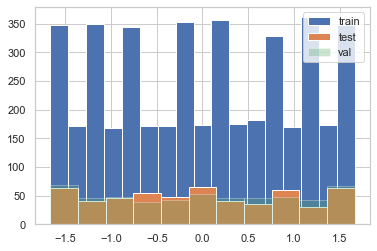

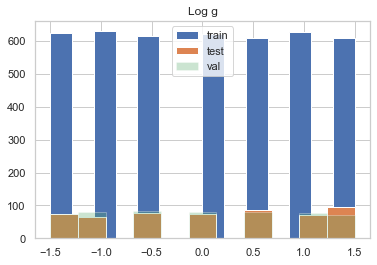

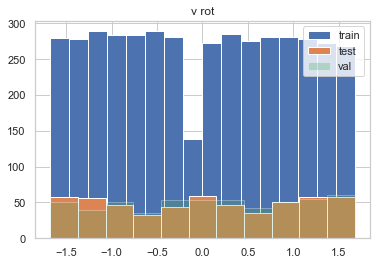

In [15]:
histograms_params(y_train[:,0], y_val[:,0], y_test[:,0], 0, ["train", "test", "val"])
histograms_params(y_train[:,1], y_val[:,1], y_test[:,1], 0, ["train", "test", "val"], "Log g")
histograms_params(y_train[:,2], y_val[:,2], y_test[:,2], 0, ["train", "test", "val"], "v rot")

In [16]:
import tensorflow as tf
import keras

### Optimizar los parámetros de esta red
***
- Puede cambiar la arquitectura, agregando o quitando capas, modificando las funciones de activación, cambiando la función de pérdida, etc.

In [17]:
print(X_train_reshaped.shape[1])
print(X_train_reshaped.shape[2])

def build_conv1D_model():
    n_timesteps = X_train_reshaped.shape[1] #210
    n_features  = X_train_reshaped.shape[2] #1 
    model = keras.Sequential(name="model_conv1D")
    model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
    
    model.add(keras.layers.Conv1D(filters=32, kernel_size=7, activation='relu', name="Conv1D_1"))
 
    model.add(keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', name="Conv1D_2"))
    
    model.add(keras.layers.Conv1D(filters=64, kernel_size=15, activation='relu', name="Conv1D_3"))
    
    
    tf.keras.layers.BatchNormalization()
    model.add(keras.layers.Flatten())
    
    
    model.add(keras.layers.Dense(32, activation= "selu", name="Dense_1"))
    
    model.add(keras.layers.Dense(16, activation= "selu", name="Dense_2"))
  
    model.add(keras.layers.Dense(3, activation = "linear", name="Dense_4"))


    optimizer = tf.keras.optimizers.RMSprop(0.001)

    l = tf.keras.losses.LogCosh()
    
    
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae','acc'])
    return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

201
1
Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 195, 32)           256       
                                                                 
 Conv1D_2 (Conv1D)           (None, 193, 16)           1552      
                                                                 
 Conv1D_3 (Conv1D)           (None, 179, 64)           15424     
                                                                 
 flatten (Flatten)           (None, 11456)             0         
                                                                 
 Dense_1 (Dense)             (None, 32)                366624    
                                                                 
 Dense_2 (Dense)             (None, 16)                528       
                                                                 
 Dense_4 (Dense)             (None, 3)          

In [18]:
ep = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='acc',patience=10)
history = model_conv1D.fit(X_train_reshaped, y_train, epochs=ep,
                    validation_data = (X_val_reshaped, y_val),verbose=1,callbacks=[callback])#

Epoch 1/100
136/136 [==============================] - 2s 11ms/step - loss: 3.4643 - mae: 1.1497 - acc: 0.3261 - val_loss: 1.1038 - val_mae: 0.8925 - val_acc: 0.5414
Epoch 2/100
136/136 [==============================] - 1s 10ms/step - loss: 1.6255 - mae: 0.9882 - acc: 0.3443 - val_loss: 1.4601 - val_mae: 0.9915 - val_acc: 0.3223
Epoch 3/100
136/136 [==============================] - 1s 9ms/step - loss: 1.0496 - mae: 0.8799 - acc: 0.3478 - val_loss: 2.8713 - val_mae: 1.4174 - val_acc: 0.3039
Epoch 4/100
136/136 [==============================] - 1s 9ms/step - loss: 2.2119 - mae: 0.9133 - acc: 0.4485 - val_loss: 0.7164 - val_mae: 0.7147 - val_acc: 0.6317
Epoch 5/100
136/136 [==============================] - 1s 10ms/step - loss: 0.9223 - mae: 0.7595 - acc: 0.5538 - val_loss: 0.7204 - val_mae: 0.7039 - val_acc: 0.7293
Epoch 6/100
136/136 [==============================] - 1s 10ms/step - loss: 1.4525 - mae: 0.7859 - acc: 0.5822 - val_loss: 0.6502 - val_mae: 0.6558 - val_acc: 0.6151
Epoch 

136/136 [==============================] - 2s 11ms/step - loss: 0.1455 - mae: 0.2653 - acc: 0.8765 - val_loss: 0.1245 - val_mae: 0.2463 - val_acc: 0.8766
Epoch 51/100
136/136 [==============================] - 1s 11ms/step - loss: 0.1460 - mae: 0.2658 - acc: 0.8753 - val_loss: 0.1275 - val_mae: 0.2454 - val_acc: 0.8932
Epoch 52/100
136/136 [==============================] - 1s 10ms/step - loss: 0.1418 - mae: 0.2647 - acc: 0.8779 - val_loss: 0.1500 - val_mae: 0.2633 - val_acc: 0.8600
Epoch 53/100
136/136 [==============================] - 2s 12ms/step - loss: 0.1443 - mae: 0.2648 - acc: 0.8726 - val_loss: 0.1055 - val_mae: 0.2232 - val_acc: 0.8950
Epoch 54/100
136/136 [==============================] - 2s 14ms/step - loss: 0.1394 - mae: 0.2579 - acc: 0.8797 - val_loss: 0.1587 - val_mae: 0.2692 - val_acc: 0.8600
Epoch 55/100
136/136 [==============================] - 1s 11ms/step - loss: 0.1323 - mae: 0.2536 - acc: 0.8795 - val_loss: 0.1562 - val_mae: 0.2971 - val_acc: 0.8950


Testing set Mean Abs Error:  298.10
17/17 [==============================] - 0s 3ms/step


ValueError: x and y must have same first dimension, but have shapes (100,) and (55,)

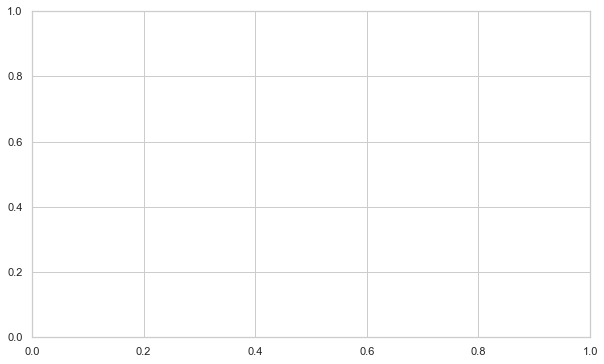

In [19]:
[loss, mae, acc] = model_conv1D.evaluate(X_test_reshaped, y_test, verbose=0)
print("Testing set Mean Abs Error: {:7.2f}".format(mae * 1000))

pred =model_conv1D.predict(X_test_reshaped)

y_pred_inv = scaler2.inverse_transform(y)


train_loss = history.history['loss']


val_loss = history.history['val_loss']


def plot_train_val(A, B, n, xlabel, ylabel, title):
    plt.figure(1, figsize=(10, 6))
    plt.plot(range(n),A)
    plt.plot(range(n),B)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend(['Training', 'Validation'])
    plt.show()


plot_train_val(train_loss, val_loss, ep, 'Loss', 'Number of epochs', 'Training loss vs Validation loss')


train_acc = history.history['acc']


val_acc = history.history['val_acc']

def plot_train_val(A, B, n, xlabel, ylabel, title):
    plt.figure(1, figsize=(10, 6))
    plt.plot(range(n),A)
    plt.plot(range(n),B)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend(['Training', 'Validation'])
    plt.show()


plot_train_val(train_acc, val_acc, ep, 'Accuracy', 'Number of epochs', 'Training Accuracy vs Validation Accuracy')

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
a = scaler2.inverse_transform(pred)
print(a[:,0].shape)


b = scaler2.inverse_transform(y_test)
print(b[:,0].shape)

plt.figure()
plt.hist(a[:,0], label="pred")
plt.hist(b[:,0], label="test")

plt.legend(loc="best")
plt.show()





In [ ]:
pred[:,0].shape

In [ ]:
plt.figure()
plt.hist(a[:,1], label="pred")
plt.hist(b[:,1], label="test")

plt.legend(loc="best")
plt.show()



In [ ]:

plt.figure()
plt.hist(a[:,2], label="pred")
plt.hist(b[:,2], label="test")

plt.legend(loc="best")
plt.show()



In [ ]:
plt.figure()
plt.hist(pred[:,0], label="pred")
plt.hist(y_test[:,0], label="test")

plt.legend(loc="best")
plt.show()


In [ ]:
plt.figure()
plt.hist(pred[:,1], label="pred")
plt.hist(y_test[:,1], label="test")

plt.legend(loc="best")
plt.show()

In [ ]:
plt.figure()
plt.hist(y_test[:,2], label="test")
plt.hist(pred[:,2], label="pred")
plt.legend(loc="best")
plt.show()

In [ ]:
mean_absolute_error(a, b)

In [ ]:
e_teff = abs(y_test[:,0] - pred[:,0])
e_logg = abs(y_test[:,1] - pred[:,1])
e_vrot = abs(y_test[:,2] - pred[:,2])

In [ ]:
plt.figure()
plt.hist(e_teff)
plt.show()

In [ ]:
plt.figure()
plt.hist(e_logg)
plt.show()

In [ ]:
plt.figure()
plt.hist(e_vrot)
plt.show()

# BeSoS lines

In [ ]:
df = pd.read_csv("hd127972_2014-01-31_07-43-08_final_corr.txt", sep="\t", header=None)

m1 = df[0] >= 4460
m2 = df[0] <= 4480

df2 = df[m1][m2]

df2

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df2[0], df2[1], label="Línea observada")
#plt.plot(df4[0], df4[1], label="Modelo")
plt.grid()
plt.legend(loc="best")
plt.show()

In [ ]:
n = 201  # for 2 random indices
index = np.random.choice(df2[0].shape[0], n, replace=False) 

In [ ]:
index.sort()

In [ ]:
obs_waves = df2[0].values[index]

obs_flux = df2[1].values[index]



In [ ]:
obs_waves.shape

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(obs_waves, obs_flux ,label="Línea observada")
plt.legend(loc="best")
plt.show()

In [ ]:
#obs_x_reshaped = x_obs_inv.reshape((1, time_steps, input_dimension))
#obs_x_reshaped = obs_x.reshape((1, time_steps, input_dimension))

obs_flux_reshaped = obs_flux.reshape((1, time_steps, input_dimension))

In [ ]:
pred_obs =model_conv1D.predict(obs_flux_reshaped)

In [ ]:
print("t_eff:", pred_obs[0][0])
print("log g:", pred_obs[0][1])
print("v_rot:", pred_obs[0][2])


## "Desnomralización de la predicción"

In [ ]:
pred_obs_inv = scaler2.inverse_transform(pred_obs)

In [ ]:
pred_obs_inv

In [ ]:
print(pred_obs_inv[0,0])
print(pred_obs_inv[0,1])
print(pred_obs_inv[0,2])